# Exploratory Data Analysis (EDA)

Analyze default rates by key features: Income, Loan Purpose, Employment Length, Credit History.

In [3]:
import sys
import os

# go one level up (from Notebook/ to project root)
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.config import PROCESSED_DATA_PATH
from src.utils import log_info

# Load cleaned data
data = pd.read_csv(PROCESSED_DATA_PATH)
log_info(f'Loaded cleaned data with shape: {data.shape}')
data.head()

2025-09-11 02:32:35,942 - INFO - Loaded cleaned data with shape: (614, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


C:\Users\anxaa\AppData\Local\Temp\ipykernel_37972\265891626.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_by_income = data.groupby('Income_Bin')['Loan_Status'].mean()


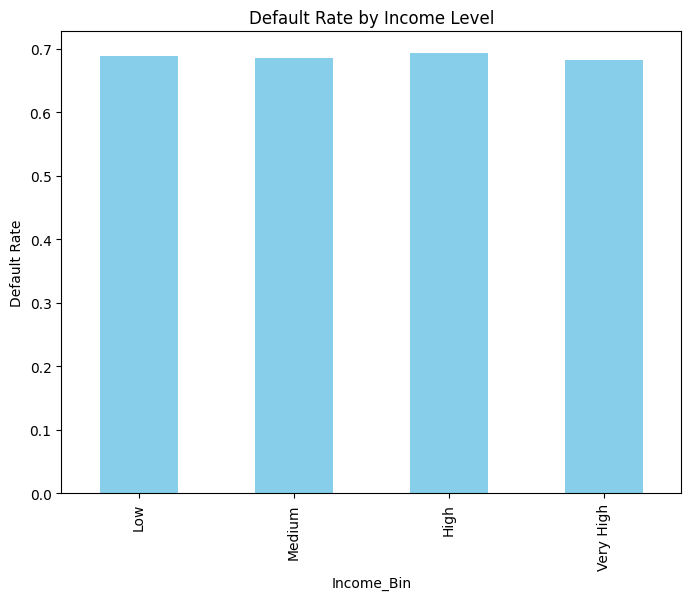

2025-09-11 02:32:37,507 - INFO - Plotted default rate by income


In [4]:
# Default rate by ApplicantIncome (binned)
data['Income_Bin'] = pd.qcut(data['ApplicantIncome'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
default_by_income = data.groupby('Income_Bin')['Loan_Status'].mean()
plt.figure(figsize=(8, 6))
default_by_income.plot(kind='bar', color='skyblue')
plt.title('Default Rate by Income Level')
plt.ylabel('Default Rate')
plt.show()
log_info('Plotted default rate by income')

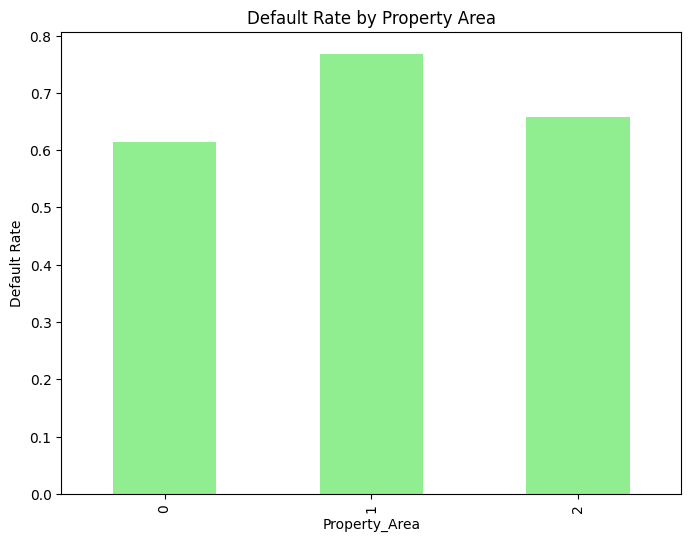

2025-09-11 02:32:39,106 - INFO - Plotted default rate by property area


In [5]:
# Default rate by Property Area
default_by_area = data.groupby('Property_Area')['Loan_Status'].mean()
plt.figure(figsize=(8, 6))
default_by_area.plot(kind='bar', color='lightgreen')
plt.title('Default Rate by Property Area')
plt.ylabel('Default Rate')
plt.show()
log_info('Plotted default rate by property area')

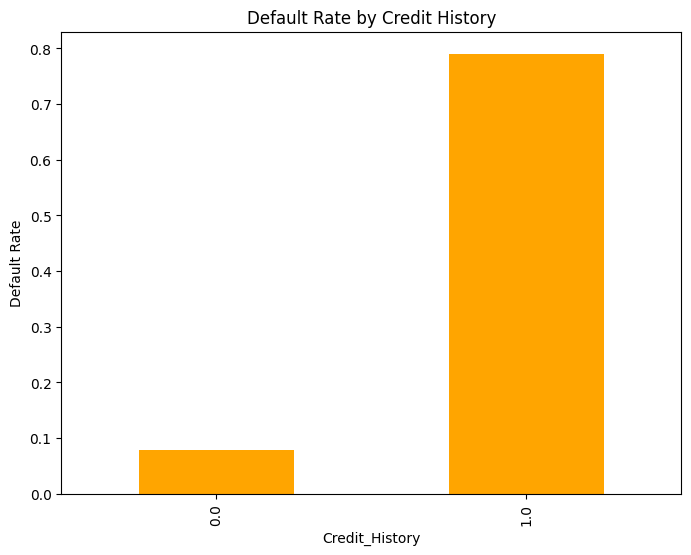

2025-09-11 02:32:40,314 - INFO - Plotted default rate by credit history


In [6]:
# Default rate by Credit History
default_by_credit = data.groupby('Credit_History')['Loan_Status'].mean()
plt.figure(figsize=(8, 6))
default_by_credit.plot(kind='bar', color='orange')
plt.title('Default Rate by Credit History')
plt.ylabel('Default Rate')
plt.show()
log_info('Plotted default rate by credit history')

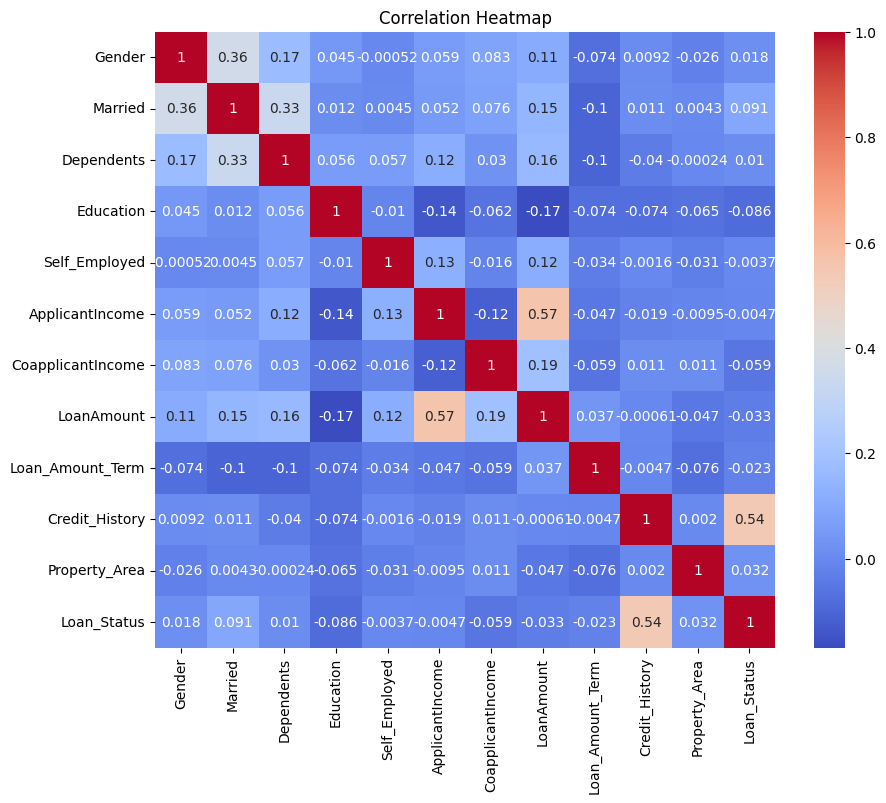

2025-09-11 02:36:30,558 - INFO - Plotted correlation heatmap


In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
log_info('Plotted correlation heatmap')